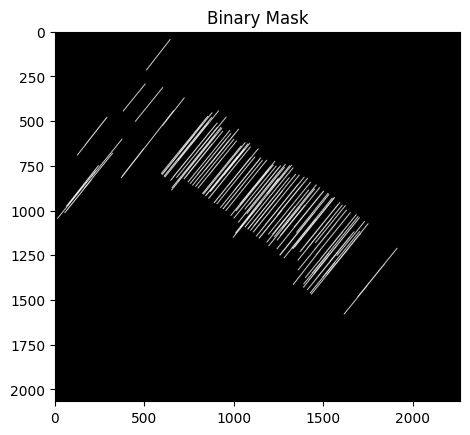

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using Canny detector
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=150, maxLineGap=10)

# Create a binary mask based on the slope condition
binary_mask = np.zeros_like(edges)
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2 - y1) / (x2 - x1 + 1e-10)  # Avoid division by zero

    # Ajusta este umbral según sea necesario para seleccionar líneas inclinadas hacia la derecha
    if 1.2 <= abs(slope) <= 2:
        cv2.line(binary_mask, (x1, y1), (x2, y2), 255, 3)

# Show the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.show()
